In [1]:
import sys
sys.path.append('../')
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
import random
import numpy as np
from utils import *
from mask_functions import *
%matplotlib inline

#### save masks indices to png format

In [4]:
# save indices where a mask is 1 as npy file
df = pd.read_csv('../data/stage2/train.csv')
size = 512
mask_dir = f'../data/npy_files/npy_masks_{size}/'
print(mask_dir)
gb = df.groupby('ImageId')
unique_ids = list(gb.groups.keys())
for image_id in tqdm(unique_ids):
    df = gb.get_group(image_id)
    mask_path = os.path.join(mask_dir, image_id + '.npy')
    if os.path.exists(mask_path):
        continue
    annotations = df['EncodedPixels'].tolist()
    mask = np.zeros([1024, 1024])
    if annotations[0] != '-1':
        for rle in annotations:
            mask += run_length_decode(rle)
    mask = cv2.resize(mask, (size, size)) # resize will generate a few value between 0 and 1
    mask = (mask >= 1).astype('uint8') # for overlap
#     if np.any(mask >= 1):
#         break
    #idx = np.argwhere(mask>=0.5)
    np.save(mask_path, mask)

../data/npy_files/npy_masks_512/


100%|██████████| 12047/12047 [00:04<00:00, 2771.90it/s]


In [34]:
mask.dtype

dtype('uint8')

In [35]:
np.unique(mask, return_counts=True)

(array([0], dtype=uint8), array([262144]))

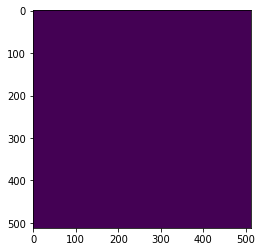

In [36]:
plt.imshow(mask)

In [17]:
df = pd.read_csv('../data/train.csv')
df = df.drop_duplicates('ImageId')
df.head()

,ImageId,EncodedPixels,has_mask
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1,1
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1,1
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002 ...,1
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 1...,1
7,1.2.276.0.7230010.3.1.4.8323329.1314.151787516...,119331 47 972 82 937 107 912 122 897 137 882 1...,1


In [20]:
# mask_idx = np.load('../data/npy_files/npy_masks/' + image_id + '.npy')
# mask = np.zeros([1024, 1024])
# mask[mask_idx[:, 0], mask_idx[:, 1]] = 1
# plt.imshow(mask);

In [68]:
mask = np.zeros([1024, 1024])
amask = mask.copy()
amask[100:200, 100:200] = 1
idx = np.argwhere(amask==1)
mask[idx[:, 0], idx[:, 1]] = 1

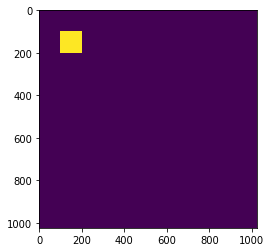

In [69]:
plt.imshow(mask)

In [82]:
mask_idx = np.load('../data/npy_masks/1.2.276.0.7230010.3.1.4.8323329.1426.1517875167.704674.npy')
mask_idx.shape
mask_idx

array([], shape=(0, 2), dtype=int64)

In [71]:
img = cv2.imread('../data/train_png/1.2.276.0.7230010.3.1.4.8323329.1000.1517875165.878027.png', cv2.IMREAD_GRAYSCALE)

In [73]:
np.save('test.npy', img)

In [74]:
!du -sh test.npy

1.1M	test.npy


### save train images in npy format

In [3]:
# save indices where a mask is 1 as npy file
df = pd.read_csv('../data/stage2/train.csv')
img_npy_dir = '../data/npy_files/npy_train_512/'
img_dir = '../data/stage2/train_png'
size = 512
gb = df.groupby('ImageId')
unique_ids = list(gb.groups.keys())
for image_id in tqdm(unique_ids):
    img_npy_path = os.path.join(img_npy_dir, image_id + '.npy')
    if os.path.exists(img_npy_path):
        continue
    img_path = os.path.join(img_dir, image_id + '.png')
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (size, size))
    img = np.expand_dims(img, -1) # [10]
    np.save(img_npy_path, img)

100%|██████████| 12047/12047 [00:10<00:00, 1185.96it/s] 


In [17]:
img[0, 0, :] # all channels have same values, save with one channel (space bachega) and use np.repeat in dataloader.

array([75], dtype=uint8)

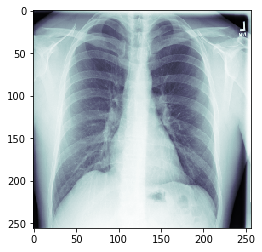

In [102]:
plt.imshow(img[:, :, 0], cmap='bone')

In [ ]:

#image_path = os.path.join(self.root, "train_png", image_id + '.png')
#img = cv2.imread(image_path)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = Image.open(image_path).convert('RGB')
#img = np.asarray(img)

    